# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируя библиотеку **pandas** , считаем данные из cvs-файла в датафрейм и сохраним в переменную `data`. Путь к файлу:
`/datasets/real_estate_data.csv`

In [1]:
#Импортируем библиотеку pandas и считаем файл с разделителем колонок '\t'
import pandas as pd
data = pd.read_csv('real_estate_data.csv', sep = '\t')

Выведем первые 20 строчек датафрейма `data` на экран.

In [2]:
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме с помощью метода `info()`

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**По выведенным данным, видим:**

1. `first_day_exposition` должен иметь тип данных `DateTime` так как имеет данные по дате и времени
2. `floors_total` - количество этажей должно иметь целочисленный тип 
3. У столбца `is_apartment` стоит другой тип данных, должен быть булевым типом (по условию)
4. `balcony` - количество балконов должно иметь целочисленный тип данных 
5. `cityCenters_nearest` - переименовать в "удобный" вид, то есть в `city_centers_nearest`, убрав верхний регистр и добавив нижнее подчеркивание
6. `days_exposition` - целочисленный тип данных       

Выведем информацию о датафрейме, используя метод describe()

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Исходя из данных можем определить что в столбцах `total_area`, `rooms`, `ceiling_height`, `living_area`, `kitchen_area`, `days_exposition` возможны аномальные значения, так как имеют неправдоподобные максимальные значения/минимальные значения/сильно большое стандартное отклонение

Построем общую гистограмму для всех столбцов таблицы, командой `data.hist(figsize=(15, 20))`.


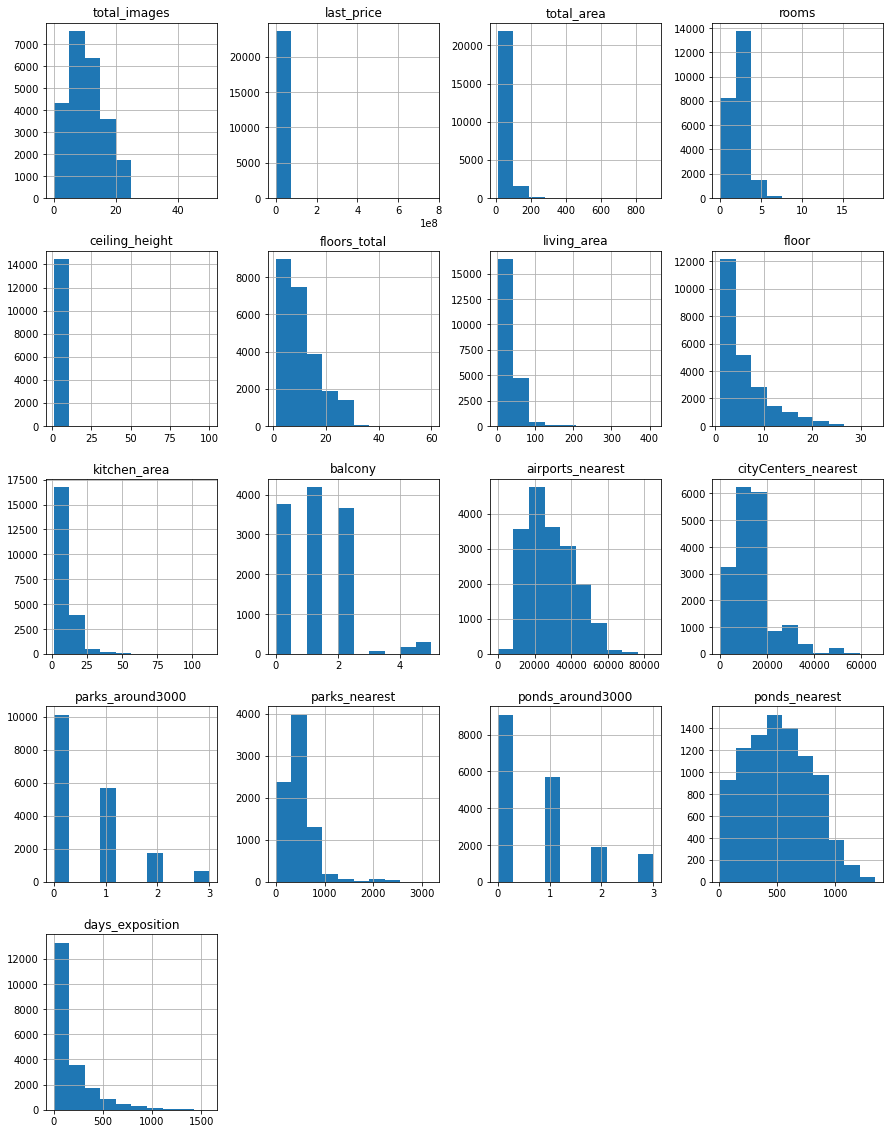

In [5]:
data.hist(figsize=(15, 20));

**<font size="4">По результатам построения общей гистограммы для всех столбцов `data` и изучения общей информации :</font>**

 Данные столбцы имеют неравномерное распределенные данные, в дальнейшем необходимо обработать выбивающиеся значения:
1. `last_price` 
2. `total_area` 
3. `rooms`
4. `ceiling_height`
5. `floors_total`
6. `living_area`
7. `kitchen_area`
8. `days_exposition`

Необходимо изменить типы данных столбцов, а также перименовать один столбец:
1. `first_day_exposition` должен иметь тип данных `DateTime` так как имеет данные по дате и времени
2. `floors_total` - количество этажей должно иметь целочисленный тип 
3. У столбца `is_apartment` стоит другой тип данных, должен быть булевым типом (по условию)
4. `balcony` - количество балконов должно иметь целочисленный тип данных 
5. `cityCenters_nearest` - переименовать в "удобный" вид, то есть в `city_centers_nearest`, убрав верхний регистр и добавив нижнее подчеркивание
6. `days_exposition` - целочисленный тип данных       

### Предобработка данных

 #### Найти и изучить пропущенные значения в столбцах:
- Определить, в каких столбцах есть пропуски.
- Заполнить пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
- В ячейке с типом markdown указать причины, которые могли привести к пропускам в данных.
    
    
 Выведем количество пропущенных значений для каждого столбца. Для этого используем комбинацию двух методов.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверим датафрейм на наличие дубликатов

In [7]:
data.duplicated().sum()

0

Дубликатов нет

Выведем наименования столбцов `data` и используем метод tolist(), для удобства прочтения вывода 

In [8]:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Переименуем столбец `cityCenters_nearest` в "удобный" вид, то есть в `city_centers_nearest`, убрав верхний регистр и добавив нижнее подчеркивание

In [9]:
#Переименуем столбец
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'})
#Проверим
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

В *14* столбцах имеются пропущенные значения.
Один из них - `balcony`, если продавец не указал число балконов, то , скорее всего, в его квартире их нет. Такие пропуски следует заменить на 0

In [10]:
#Изменим пропущенные данные в столбце 'balcony' на 0
#И проверим наличие пропущенных значений в столбце 'balcony'
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Удалим строки с пустыми значениями `locality_name`, так как не можем определить их местонахождение

In [11]:
#Удаляем строки с пустым значением в столбце `locality_name`
data = data.dropna(subset = ['locality_name'])
#Сбросим индексы
data = data.reset_index(drop = True)
#Проверим
data['locality_name'].isna().sum()

0

Если продавец не указал значение в столбце `is_apartment`, то , скорее всего, это не апартаменты. Такие пропуски можно заменить на `False`

In [12]:
#Заменим пропуски столбца 'is_apartment' на False
data['is_apartment'] = data['is_apartment'].fillna(False)
#Проверим
data['is_apartment'].isna().sum()

0

Проверим наличие значения 0 в столбце `floors_total` 

In [13]:
data[data['floors_total'] == 0]['floors_total'].count()

0

Скорее всего продавец либо не знал количество этажей в доме или не было этажей и так как в этом столбце отсутствуют значения 0, можно вместо пустых значений записать 0

In [14]:
data['floors_total'] = data['floors_total'].fillna(0)

Для заполнения пустых значений столбца `living_area` и `kitchen_area` вычислим отношение медианных значений данных площадей к медианному значению общей площади и умножим данные значения на общую площадь той или иной площади `living_area`и `kitchen_area` где есть пропуски: 

In [15]:
#Заполним пропуски для 'living_area'
data.living_area = data.living_area.fillna((data.living_area.median()/ data.total_area.median()) * data.total_area)
#Заполним пропуски для 'kitchen_area'
data.kitchen_area = data.kitchen_area.fillna((data.kitchen_area.median()/ data.total_area.median()) * data.total_area)
#Проверим наличие пропусков
data.living_area.isna().sum(), data.kitchen_area.isna().sum()

(0, 0)

Проверим количество пропусков для `data` по всем столбцам, после заполнения пропусков в столбцах `balcony`, `floors_total`, `is_apartment`, `living_area`, `kitchen_area` и удаления строк с пустыми значениями в `locality_name`

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Пропуски по столбцам:
- `airports_nearest`
- `city_centers_nearest`    
- `parks_around3000 `  
- `parks_nearest `      
- `ponds_around3000`  
- `ponds_nearest`

Скорее всего продавец либо не знал расстояний, либо же поленился заполнить данные столбцы

Пропуски по столбцам `ceiling_height`, `airports_nearest`, `city_centers_nearest`, `parks_nearest `, `ponds_nearest` заполним позже, после того как будут скорректированы наименования населенных пунктов.

#### Рассмотреть типы данных в каждом столбце:
- Найти столбцы, в которых нужно изменить тип данных.
- Преобразовать тип данных в выбранных столбцах.
- В ячейке с типом markdown пояснить, почему нужно изменить тип данных.

Вывдем информацию о типах данных столбцов `data`

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Тип столбца `is_apartment` автоматически поменялся на булевый тип, после заполнения пустых значений, значением `False`.

Изменим типы данных столбцов описанных выше:
1. `first_day_exposition` должен иметь тип данных `DateTime` так как имеет данные по дате и времени и в дальнейшем нужно вывести из этого столбца день недели, месяц, год
2. `floors_total` - количество этажей должно иметь целочисленный тип 
3. `balcony` - количество балконов должно иметь целочисленный тип данных 
4. `days_exposition` - количество дней должно иметь целочисленный тип данных, но так как в этом столбце есть пропущенные значения, которые не известно чем можно их заполнить, оставим тип float64

In [18]:
#Изменим тип данных столбца 'first_day_exposition' используя метод to_datetime() 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = "%Y-%m-%dT%H:%M:%S" )
#Изменим тип данных столбцов 'floors_total', 'balcony' в целочисленный, используя метод astype()
#А также, изменим размеры типов данных
data.total_images = data.total_images.astype('int16')
data.last_price = data.last_price.astype('float32')
data.total_area = data.total_area.astype('float32')
data.rooms = data.rooms.astype('int16')
data.ceiling_height = data.ceiling_height.astype('float16')
data.floors_total = data.floors_total.astype('int16')
data.living_area = data.living_area.astype('float32')
data.floor = data.floor.astype('int16')
data.kitchen_area = data.kitchen_area.astype('float32')
data.balcony = data.balcony.astype('int16')

data.airports_nearest = data.airports_nearest.astype('float32')
data.city_centers_nearest = data.city_centers_nearest.astype('float32')
data.parks_around3000 = data.parks_around3000.astype('float16')

data.parks_nearest = data.parks_nearest.astype('float32')
data.ponds_around3000 = data.ponds_around3000.astype('float16')
data.ponds_nearest = data.ponds_nearest.astype('float32')
data.days_exposition = data.days_exposition.astype('float32')

#Проверим измененные типы данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int16         
 1   last_price            23650 non-null  float32       
 2   total_area            23650 non-null  float32       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int16         
 5   ceiling_height        14490 non-null  float16       
 6   floors_total          23650 non-null  int16         
 7   living_area           23650 non-null  float32       
 8   floor                 23650 non-null  int16         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float32       
 13  balcony         

#### Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты. 
Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [19]:
#Выведем количество уникальных значений столбца `locality_name`
print(len(data['locality_name'].unique()))
#Выведем уникальные значения столбца `locality_name`
data['locality_name'].unique().tolist()

364


['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [20]:
#Выведем количество уникальных значений
print(len(data['locality_name'].unique()))
#Уберем верхний регистр в названиях
data['locality_name'] = data['locality_name'].str.lower()
#Выведем количество уникальных значений
print(len(data['locality_name'].unique()))
#Заменим ё на е
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
#Выведем количество уникальных значений
print(len(data['locality_name'].unique()))


364
364
330


In [70]:
#Для наименований "поселок городского типа", "городской поселок" и "поселок" запишем одно название - "поселок"
for value in data['locality_name'].unique():
    if 'городской поселок' in value:
        data['locality_name'] = data['locality_name'].replace('городской поселок', 'поселок', regex=True)
    elif 'поселок городского типа' in value:
       data['locality_name'] = data['locality_name'].replace('поселок городского типа', 'поселок', regex=True)
#Проверим количество уникальных значений
print(len(data['locality_name'].unique()))

322


Устранены 42 неявных дубликатов

#### Найти и устранить редкие и выбивающиеся значения. 
 Например, в столбце `ceiling_height` может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.
- Если природа аномалии понятна и данные действительно искажены, то восстановить корректное значение.
- В противном случае удалить редкие и выбивающиеся значения.
- В ячейке с типом markdown описать, какие особенности в данных обнаружены.

По результатам гистограмм и метода `describe()` выделены следующие столбцы с возможными аномальными значениями:
1. `last_price` 
2. `total_area` 
3. `rooms`
4. `ceiling_height`
5. `floors_total`
6. `living_area`
7. `kitchen_area`
8. `days_exposition`

Рассмотрим данные столбцы применив метод `describe()`

In [22]:
data[['last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'days_exposition']].describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,kitchen_area,days_exposition
count,23650.0,23650.000000,23650.000000,14490.000000,23650.000000,23650.000000,23650.000000,20470.000000
mean,6541129.0,60.329212,2.070106,2.771484,10.637505,34.612309,10.502038,180.753204
std,10896367.0,35.661705,1.078620,1.261719,6.613891,22.386599,6.036749,219.778961
min,12190.0,12.000000,0.000000,1.000000,0.000000,2.000000,1.300000,1.000000
25%,3400000.0,40.000000,1.000000,2.519531,5.000000,19.000000,7.000000,45.000000
50%,4650000.0,52.000000,2.000000,2.650391,9.000000,30.000000,9.000000,95.000000
75%,6799000.0,69.699997,3.000000,2.800781,16.000000,42.115383,12.000000,231.000000
max,763000000.0,900.000000,19.000000,100.000000,60.000000,409.700012,112.000000,1580.000000


Аномальные значения:
- максимальная цена 763000000
- максимальная общая площадь 900 $м^2$
- количество комнат 19
- высота потолка 1м и 100м
- максимальный этаж 60
- максимальная жилая площадь 409.7 $м^2$ и минимальная 2 $м^2$ 
- максимальная площадь кухни 112 $м^2$ и минимальная 1.3 $м^2$
- максимальное значение количества размещенных дней - 1580 дней

В столбце `ceiling_height` может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Проанализируем столбец `ceiling_height`, выведем его уникальные значения

In [23]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В данных есть такие значения как 24, 25 итд, целесообразно заменить их на 2.4, 2.5 итд. Для этого все значения больше 10 разделим на 10.

In [24]:
#значения которые больше 10, разделим на 10
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] /= 10
print(data['ceiling_height'].unique())

[ 2.7      nan  3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
  2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
  2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
  3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76   2.58
  3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
  3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
  2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
  3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
  3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
  3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
  4.8    4.5    4.2    3.36   3.08   3.68   3.07   3.37   3.09   8.
  3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22   3.27
  4.1    2.93   3.46   3.47   3.33   3.63   3.32   1.2    8.3    2.98
  2.86   3.17   4.4    3.28   3.04   4.45   5.5    3.84   3.23   3.02
  3.21   3.43   3.78   

Заполним пропуски столбца `ceiling_height` по населенным пунктам, а оставшиеся пропуски заполним общей медианой:

In [25]:
#Выведем все пустые значения "ceiling_height" до заполнения
print(data.ceiling_height.isna().sum())
for value in data.locality_name.unique():
    mediana = data.loc[data['locality_name'] == value, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna() == True ) & (data['locality_name'] == value), 'ceiling_height'] = mediana
#Выведем все пустые значения "ceiling_height" после заполнения
print(data.ceiling_height.isna().sum())
#Заполним эти значения общей медианой
data.loc[(data['ceiling_height'].isna() == True ), 'ceiling_height'] = mediana
#Проверим еще раз количество пропусков
print(data.ceiling_height.isna().sum())

9160
100
0


Удалим строки с высотой меньше 2 метров 

In [26]:
#проверим количество потолков ниже 2 метров
print(data.loc[data['ceiling_height'] < 2]['ceiling_height'].count() )
#Выведем количество строк в датафрейме до удаления строк с потолками ниже 2
print(len(data))
#Удалим строки с высотой меньше 2 метра
data = data.query('ceiling_height >= 2')
#Выведем количество строк в датафрейме после удаления строк, для проверки
print(len(data))
#Сбросим индексы
data = data.reset_index(drop = True)

5
23650
23645


Заполним пропуски столбцов `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` по населенным пунктам, а оставшиеся пропуски оставим. Для этого напишем функцию высчитывающую медиану по населенному пункту:

In [27]:
def mediana_func(df, nearest):
    for value in df.locality_name.unique():
        mediana = df.loc[df['locality_name'] == value, nearest].median()
        df.loc[(df[nearest].isna() == True ) & (df['locality_name'] == value), nearest] = mediana

mediana_func(data, 'airports_nearest')
mediana_func(data, 'city_centers_nearest')
mediana_func(data, 'parks_nearest')
mediana_func(data, 'ponds_nearest')
#Проверим количество пропущенных значений после обработки
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4863
city_centers_nearest    4863
parks_around3000        5509
parks_nearest           5997
ponds_around3000        5509
ponds_nearest           4971
days_exposition         3180
dtype: int64

Проанализируем столбец `last_price`, применив метод `describe()`

In [28]:
data['last_price'].describe()

count        23645.0
mean       6541560.5
std       10897417.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6799000.0
max      763000000.0
Name: last_price, dtype: float64

Рассмотрим межквартильный размах и гистограмму

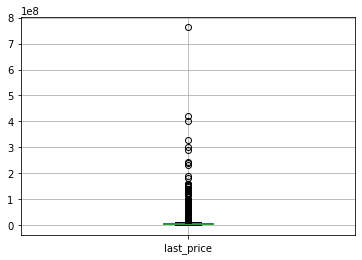

In [29]:
data.boxplot('last_price');

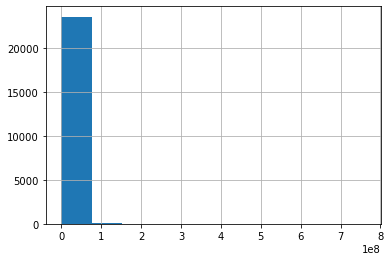

In [30]:
data['last_price'].hist();

По данным гистограммы, рассмотрим количество строк, где цена больше 100000000

In [31]:
data[data['last_price'] > 100000000]['last_price'].count()

37

Удалим эти 37 строк

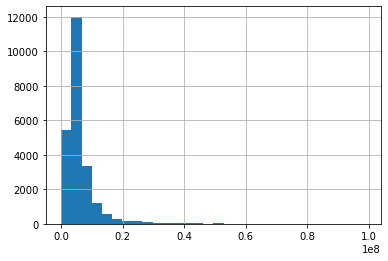

In [32]:
data = data.query('last_price < 100000000')
#Сбросим индексы
data = data.reset_index(drop = True)
#Выведем гистограмму после удаления строк
data['last_price'].hist(bins = 30);

Гистограмма стала выглядеть намного лучше. Идем дальше, просмотрим данные столбца `total_area`, выведем гистограмму столбца

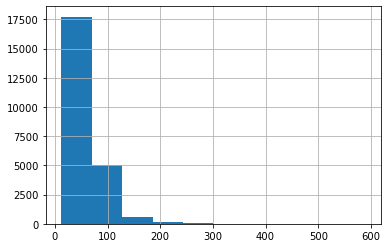

In [33]:
data['total_area'].hist();


По данным гистограммы, рассмотрим количество строк, где общая площадь больше 300

In [34]:
data[data['total_area'] > 300]['total_area'].count()

45

Удалим эти 45 строк

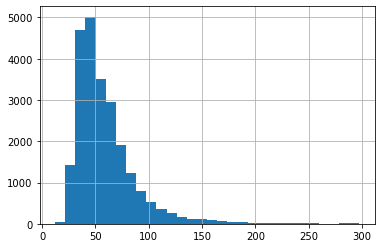

In [35]:
data = data.query('total_area < 300')
#Сбросим индексы
data = data.reset_index(drop = True)
#Выведем гистограмму после удаления строк
data['total_area'].hist(bins = 30);

Гистограмма стала выглядеть намного лучше. Идем дальше, просмотрим гистограммы столбцов `rooms`, `floors_total`, `living_area`, `kitchen_area`, `days_exposition`, `ceiling_height`

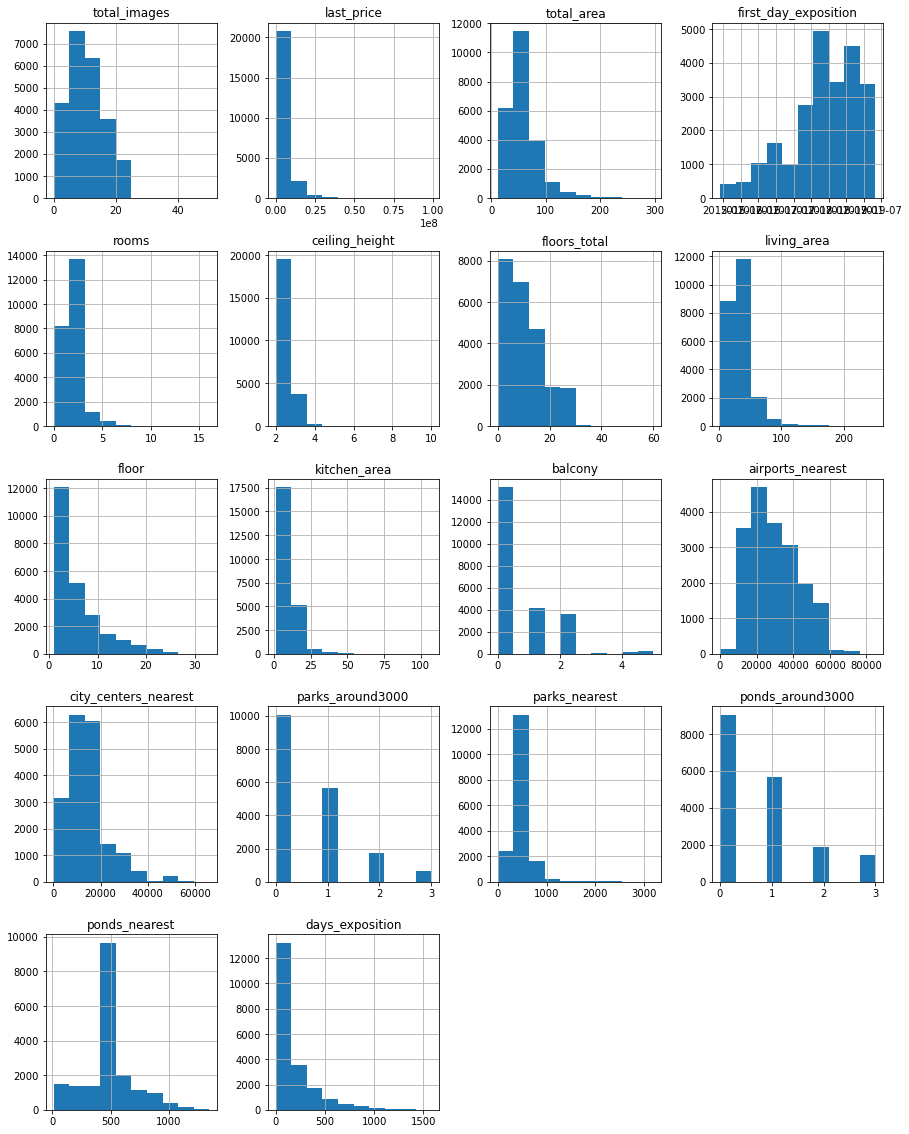

In [36]:
data.hist(figsize=(15, 20));

In [37]:
#По данным гистограммы, рассмотрим количество строк
print(data[data['rooms'] > 7]['rooms'].count())
print(data[data['floors_total'] > 35]['floors_total'].count())
print(data[data['living_area'] > 180]['living_area'].count())
print(data[data['kitchen_area'] > 50]['kitchen_area'].count())
print(data[(data['days_exposition'] > 1400) | (data['days_exposition'] <= 2)]['days_exposition'].count())
print(data[data['ceiling_height'] > 4.5]['ceiling_height'].count())

18
5
13
35
23
12


Удалим эти строки

In [38]:
data = data.query('kitchen_area <= 50 & rooms <= 7 & floors_total <= 35 & living_area <= 180 & ceiling_height <= 4.5')
data = data.query('((days_exposition > 2) & (days_exposition <= 1400)) | (days_exposition.isna() == True)')
#Сбросим индексы
data = data.reset_index(drop = True)
#Посчитаем сколько значений удалено, после обработки
23699 - len(data)

242

Всего удалено 242 строк, это меньше 10% всего датафрейма

Выведем гистограммы после удаления строк

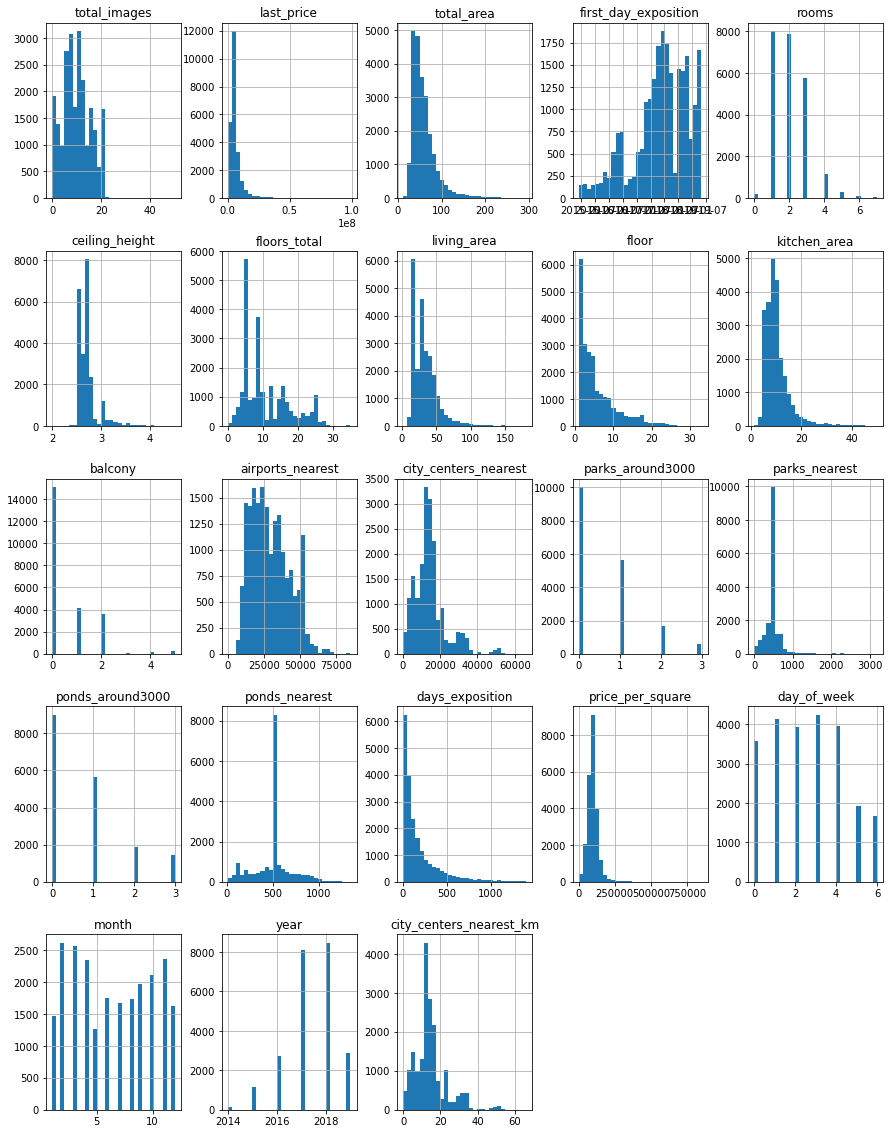

In [71]:
#Выведем гистограммы после удаления строк
data.hist(bins =30, figsize=(15, 20));

In [40]:
data[data['days_exposition'] == 2]['total_area'].count()

0

### Посчитайте и добавьте в таблицу новые столбцы

**Добавить в таблицу новые столбцы со следующими параметрами:**
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [41]:
#Создаем новый столбец `price_per_square` - цена одного квадратного метра
data['price_per_square'] = data['last_price']/data['total_area']
#Округлим значение до сотых
data['price_per_square'] = round(data['price_per_square'], 2)
#Посмотрим на обновленный датафрейм
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square
0,20,13000000.0,108.000000,2019-03-07,3,2.699219,16,51.000000,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188
1,7,3350000.0,40.400002,2018-12-04,1,2.630859,11,18.600000,1,False,...,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,584.5,81.0,82920.789062
2,10,5196000.0,56.000000,2015-08-20,2,2.699219,5,34.299999,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938
3,0,64900000.0,159.000000,2015-07-24,3,2.699219,14,91.730766,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.093750
4,2,10000000.0,100.000000,2018-06-19,2,3.029297,14,32.000000,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


In [42]:
#Создаем новые столбцы `day_of_week`, `month`, `year`
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
#Посмотрим на обновленный датафрейм
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year
0,20,13000000.0,108.000000,2019-03-07,3,2.699219,16,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3,3,2019
1,7,3350000.0,40.400002,2018-12-04,1,2.630859,11,18.600000,1,False,...,18603.0,0.0,NaN,0.0,584.5,81.0,82920.789062,1,12,2018
2,10,5196000.0,56.000000,2015-08-20,2,2.699219,5,34.299999,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8,2015
3,0,64900000.0,159.000000,2015-07-24,3,2.699219,14,91.730766,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.093750,4,7,2015
4,2,10000000.0,100.000000,2018-06-19,2,3.029297,14,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


In [43]:
#Создаем столбец с типом этажа квартиры (значения — «первый», «последний», «другой»); Для этого напишем функцию `categorize_floo`
def categorize_floo(floor, total_f):
    if floor == 1:
        return 'первый'
    elif floor == total_f:
        return 'последний'            
    else:
        return 'другой'
data['floor_type'] = data.apply(lambda x: categorize_floo(x['floor'], x['floors_total']), axis =  1)
#Проверим работу функции
display(data.loc[:, ['floor', 'floors_total','floor_type']])

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
...,...,...,...
23452,3,5,другой
23453,4,5,другой
23454,1,3,первый
23455,12,17,другой


Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [44]:
#Для того чтобы перевести из м в километры, нужно поделить значение на 1000 
#Округляем до целого значения
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)
#Просмотр обновленой таблицы, путем вывода первых 5 строк
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.000000,2019-03-07,3,2.699219,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.367188,3,3,2019,другой,16.0
1,7,3350000.0,40.400002,2018-12-04,1,2.630859,11,18.600000,1,False,...,NaN,0.0,584.5,81.0,82920.789062,1,12,2018,первый,19.0
2,10,5196000.0,56.000000,2015-08-20,2,2.699219,5,34.299999,4,False,...,90.0,2.0,574.0,558.0,92785.710938,3,8,2015,другой,14.0
3,0,64900000.0,159.000000,2015-07-24,3,2.699219,14,91.730766,9,False,...,84.0,3.0,234.0,424.0,408176.093750,4,7,2015,другой,7.0
4,2,10000000.0,100.000000,2018-06-19,2,3.029297,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Изучить следующие параметры объектов:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.
* Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.


Выделим столбцы для дальнейшей работы с ними и запишем в новый датафрейм `data_1`

In [45]:
data_1 = (data.loc[:,['total_area','living_area','kitchen_area','last_price','rooms','ceiling_height','floor','floor_type','floors_total', 'city_centers_nearest', 'airports_nearest',  'parks_nearest', 'is_apartment', 'balcony', 'days_exposition']])
#Выведем список характерных значений для нового датафрейма - count, mean, std(стандартное отклонение), min, первый, второй, третий квартили, max
data_1.describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,balcony,days_exposition
count,23457.000000,23457.000000,23457.000000,23457.0,23457.000000,23457.000000,23457.000000,23457.000000,18598.000000,18598.000000,17464.000000,23457.000000,20308.000000
mean,58.830429,33.760571,10.289534,6080265.5,2.046297,2.699219,5.899433,10.659249,14512.089844,29536.162109,476.245148,0.592616,178.894531
std,28.838964,18.721626,5.144727,5759110.0,1.014428,0.213867,4.885881,6.599942,8579.683594,13079.279297,235.107361,0.959022,215.614670
min,12.000000,2.000000,1.300000,12190.0,0.000000,2.000000,1.000000,0.000000,181.000000,0.000000,1.000000,0.000000,3.000000
25%,40.000000,19.000000,7.000000,3400000.0,1.000000,2.550781,2.000000,5.000000,9601.250000,18748.000000,428.500000,0.000000,45.000000
50%,52.000000,30.000000,9.000000,4600000.0,2.000000,2.699219,4.000000,9.000000,13296.500000,27278.500000,460.000000,0.000000,95.000000
75%,69.000000,42.000000,11.900000,6700000.0,3.000000,2.699219,8.000000,16.000000,16769.000000,38795.000000,460.000000,1.000000,229.000000
max,293.600006,180.000000,50.000000,99000000.0,7.000000,4.500000,33.000000,35.000000,65968.000000,84869.000000,3190.000000,5.000000,1396.000000


В результате вывода характерных значений можно определить, что:
* Самое большое стандартное отклонение у столбца `last_price`. Это вызвано за счет того что данные сильно разнятся
* Наименьшее стандартное отклонение у высоты потолка `ceiling_height`, действительно, высота потолка колеблется между 2 и 4.5м

В дальнейшем, для наглядности построим диаграмму размаха, для каждого выделенного столбца
А пока, построим гистограмму для столбца `total_area`, а также графики отношения данного столбца с остальными

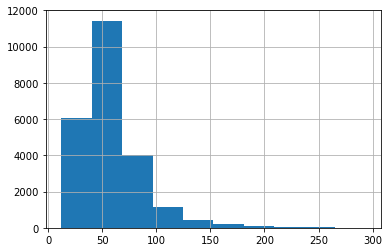

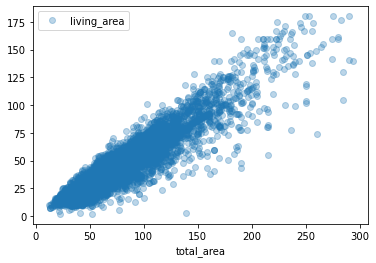

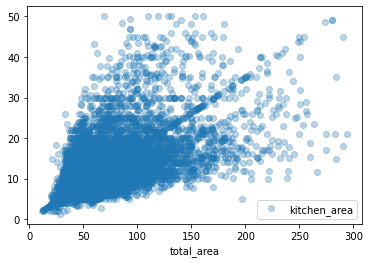

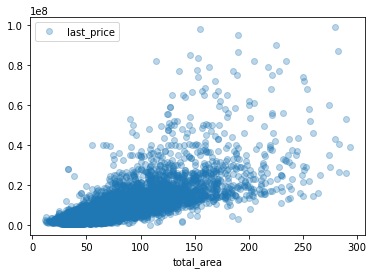

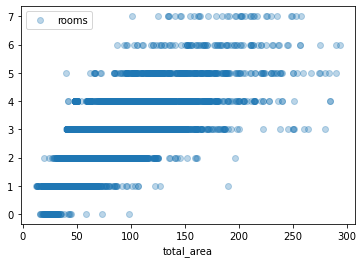

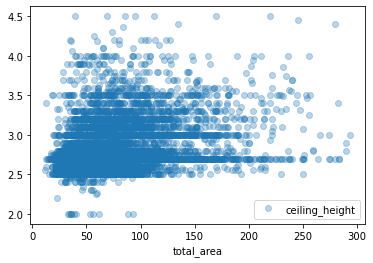

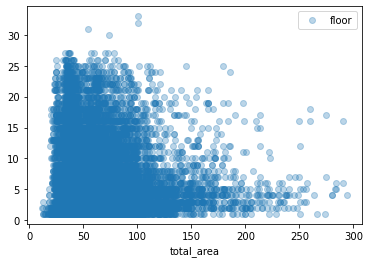

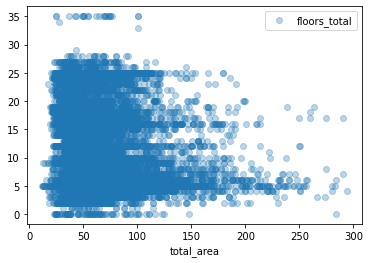

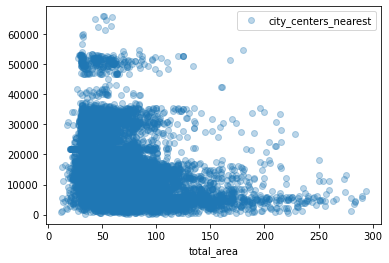

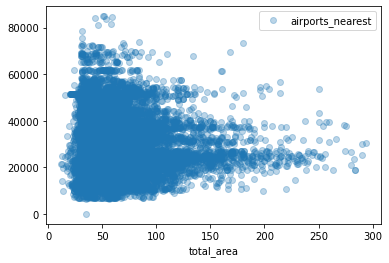

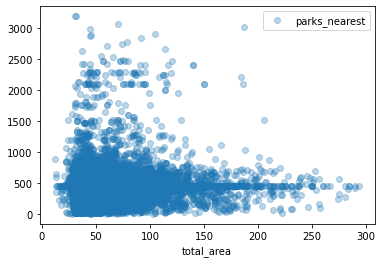

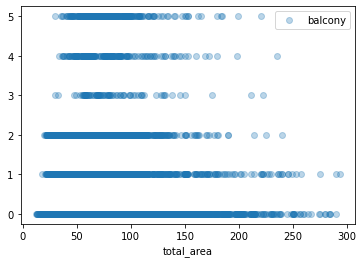

In [72]:
data['total_area'].hist()
data.plot(x = 'total_area', y = 'living_area', style = 'o', alpha =0.3)
data.plot(x = 'total_area', y = 'kitchen_area', style = 'o', alpha =0.3)
data.plot(x = 'total_area', y = 'last_price', style = 'o', alpha =0.3)
data.plot(x = 'total_area', y = 'rooms', style = 'o', alpha =0.3)
data.plot(x = 'total_area', y = 'ceiling_height', style = 'o', alpha =0.3)
data.plot(x = 'total_area', y = 'floor', style = 'o', alpha =0.3)
data.plot(x = 'total_area', y = 'floors_total', style = 'o', alpha =0.3)
data.plot(x = 'total_area', y = 'city_centers_nearest', style = 'o', alpha =0.3)
data.plot(x = 'total_area', y = 'airports_nearest', style = 'o', alpha =0.3)
data.plot(x = 'total_area', y = 'parks_nearest', style = 'o', alpha =0.3)
data.plot(x = 'total_area', y = 'balcony', style = 'o', alpha =0.3);

По результатам графиков можно определить:
- Гистограмма имеет скошенное вправо распределение 
- Наибольшее количество значений находятся в ячейке 40 - 70 $м^2$
- Чем больше общая площадь недвижимости, тем больше жилая площадь
- Площадь кухни в основном идет от 25 - 140 $м^2$
- Также, больше общая площадь недвижимости, тем больше площадь кухни
- Чем больше общая площадь недвижимости, тем больше цена на момент снятия с публикации
- Чем больше общая площадь недвижимости, тем больше комнат
- Общая площадь не влияет на высоту потолка
- Чаще продают дома на этажах с 1 - 10
- Общая площадь не сильно влияет на количество этажей в доме
- Наибольшое количество недвижимости с площадью с 30 - 80 $м^2$ находятся ближе к центру города
- Наибольшое количество недвижимости с площадью с 30 - 80 $м^2$ находятся ближе и в среднем диапазоне от аэропорта
- Наибольшое количество недвижимости с площадью с 30 - 80 $м^2$ находятся ближе к парку
- Общая площадь не влияет на количество балконов

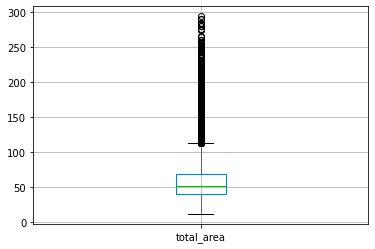

In [73]:
data.boxplot('total_area');

- Межквартильный размах 40 - 69
- Медианное значение 52

Далее рассмотрим столбец `living_area`. Построим гистограмму для столбца, а также графики отношения данного столбца с остальными

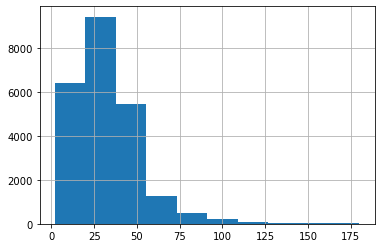

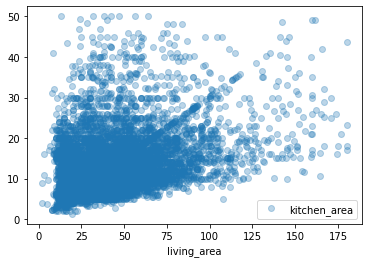

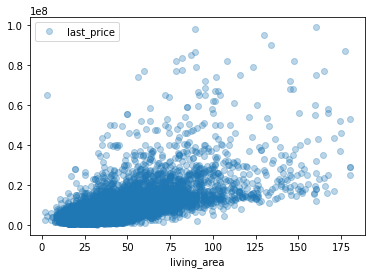

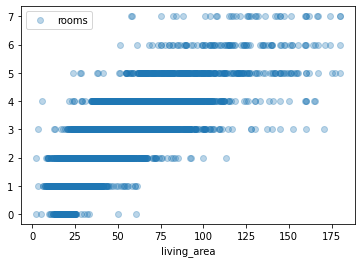

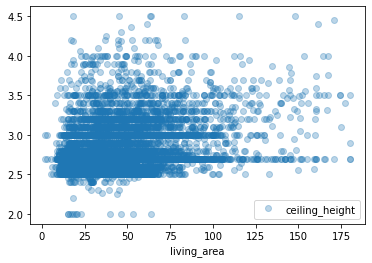

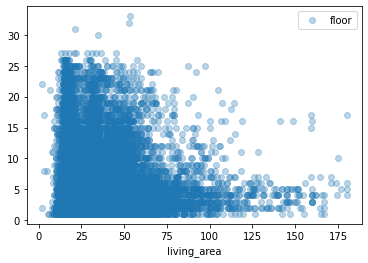

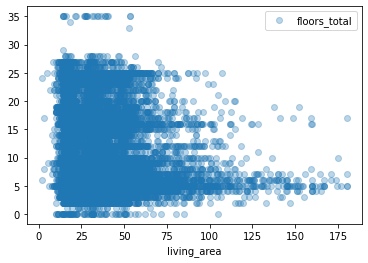

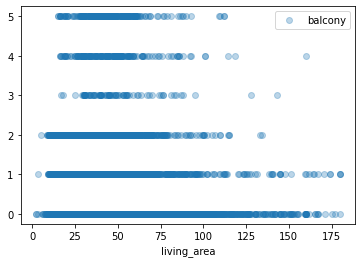

In [74]:
data['living_area'].hist()
data.plot(x = 'living_area', y = 'kitchen_area', style = 'o', alpha =0.3)
data.plot(x = 'living_area', y = 'last_price', style = 'o', alpha =0.3)
data.plot(x = 'living_area', y = 'rooms', style = 'o', alpha =0.3)
data.plot(x = 'living_area', y = 'ceiling_height', style = 'o', alpha =0.3)
data.plot(x = 'living_area', y = 'floor', style = 'o', alpha =0.3)
data.plot(x = 'living_area', y = 'floors_total', style = 'o', alpha =0.3)
data.plot(x = 'living_area', y = 'balcony', style = 'o', alpha =0.3);

По результатам графиков можно определить:
- Гистограмма имеет скошенное вправо распределение 
- Гистограмма имеет пик в ячейке от 20 - 35 $м^2$
- Площадь кухни в основном идет от 5 - 20 $м^2$
- Чем больше жилая площадь тем больше цена на момент снятия с публикации
- Чем больше жилая площадь недвижимости, тем больше комнат
- Жилая площадь не влияет на высоту потолка
- В пиковом значении недвижимость имеет этажи от 1 -25
- Чем больше жилая площадь тем ниже этаж
- Общая площадь не влияет на количество балконов
- Межквартильный размах 19 -42
- Медианное значение 30 

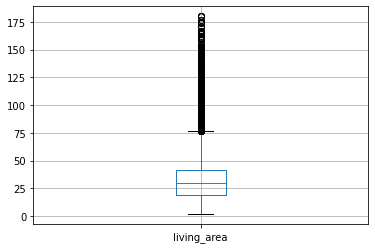

In [75]:
data.boxplot('living_area');

Далее рассмотрим столбец `kitchen_area`. Построим гистограмму для столбца, а также графики отношения данного столбца с остальными

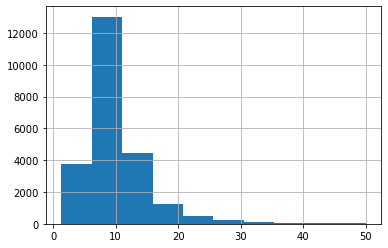

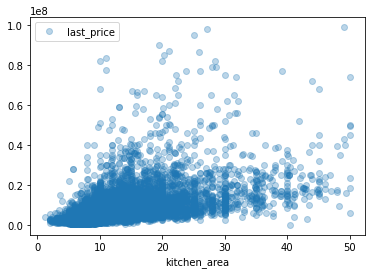

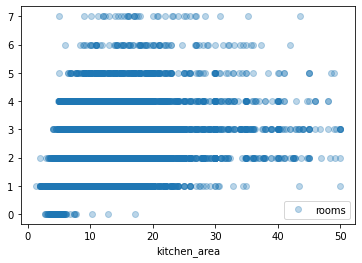

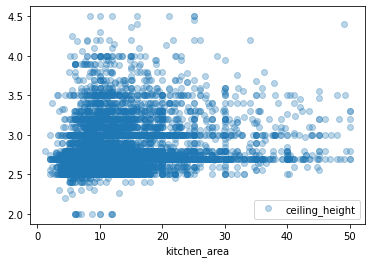

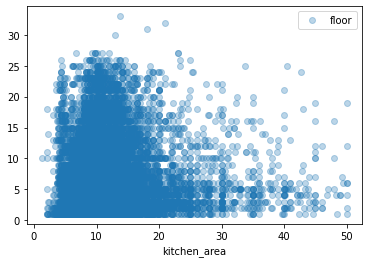

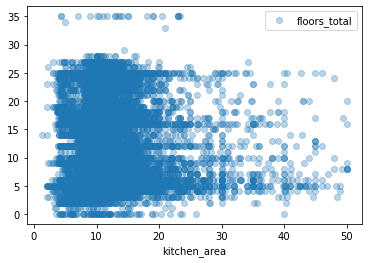

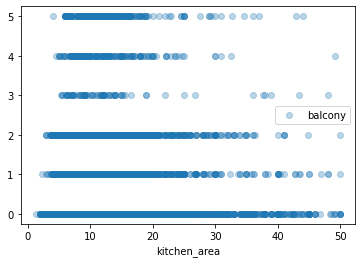

In [76]:
data['kitchen_area'].hist()
data.plot(x = 'kitchen_area', y = 'last_price', style = 'o', alpha =0.3)
data.plot(x = 'kitchen_area', y = 'rooms', style = 'o', alpha =0.3)
data.plot(x = 'kitchen_area', y = 'ceiling_height', style = 'o', alpha =0.3)
data.plot(x = 'kitchen_area', y = 'floor', style = 'o', alpha =0.3)
data.plot(x = 'kitchen_area', y = 'floors_total', style = 'o', alpha =0.3)
data.plot(x = 'kitchen_area', y = 'balcony', style = 'o', alpha =0.3);

По результатам графиков можно определить:
- Гистограмма имеет скошенное вправо распределение 
- Гистограмма имеет пик в ячейке от 5 - 11 $м^2$
- Чем больше площадь кухни, тем больше цена на момент снятия с публикации
- Площадь кухни не влияет на количество комнат
- Жилая площадь не влияет на высоту потолка
- В диапазоне площади кухни с 6 - 20 $м^2$ этажи в основном идут с 1 - 15
- Для площади кухни 8 - 17 $м^2$ общее количество этажей в доме в основном с 1 -25
- Общая площадь не влияет на количество балконов
- Межквартильный размах 7 - 11.9
- Медианное значение 9

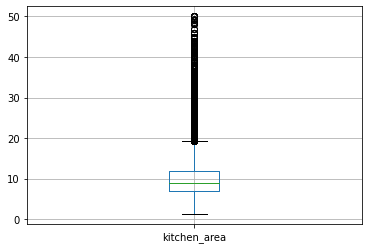

In [77]:
data.boxplot('kitchen_area');

Далее рассмотрим столбец `last_price`. Построим гистограмму для столбца, а также графики отношения данного столбца с остальными

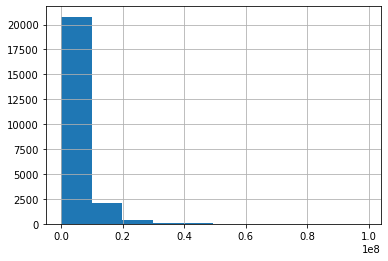

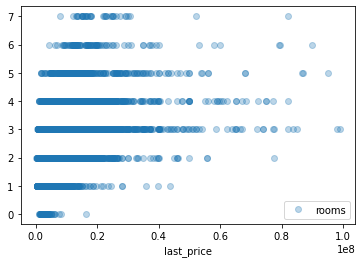

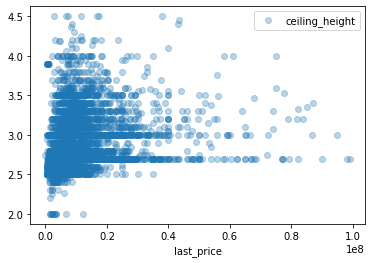

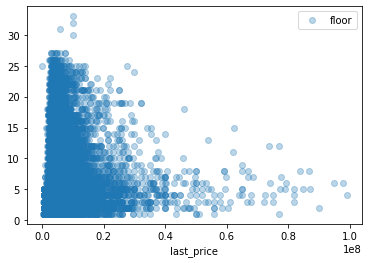

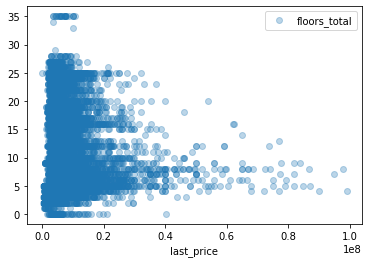

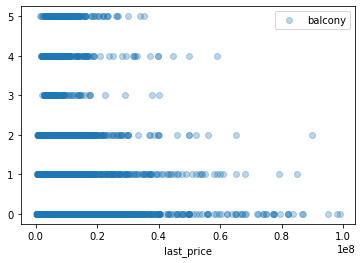

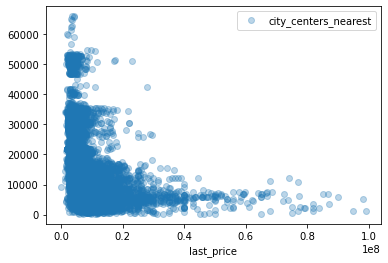

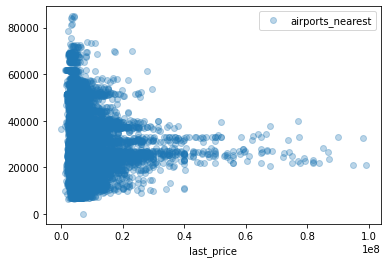

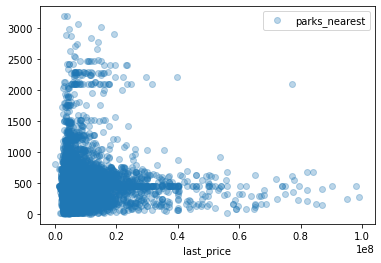

In [78]:
data['last_price'].hist()
data.plot(x = 'last_price', y = 'rooms', style = 'o', alpha =0.3)
data.plot(x = 'last_price', y = 'ceiling_height', style = 'o', alpha =0.3)
data.plot(x = 'last_price', y = 'floor', style = 'o', alpha =0.3)
data.plot(x = 'last_price', y = 'floors_total', style = 'o', alpha =0.3)
data.plot(x = 'last_price', y = 'balcony', style = 'o', alpha =0.3)
data.plot(x = 'last_price', y = 'city_centers_nearest', style = 'o', alpha =0.3)
data.plot(x = 'last_price', y = 'airports_nearest', style = 'o', alpha =0.3)
data.plot(x = 'last_price', y = 'parks_nearest', style = 'o', alpha =0.3);

По результатам графиков можно определить:
- Гистограмма имеет распределение Пуассона, 
- Наибольшее количество значений находятся в ячейке 0 - 0.1
- Чем больше комнат, тем выше цена
- Цена не влияет на высоту потолка
- Чем выше цена, тем ниже этаж недвижимости 
- Чем выше цена, тем ниже общий этаж недвижимости 
- Чем выше цена, тем меньше балконов
- Чем выше цена тем ближе к центру населенного пункта
- Чаще ниже цена, тем ближе к аэропорту 
- Наибольшое количество недвижимости с ценой с 0.3 - 0.4 находятся ближе к парку
- Межквартильный размах 3400000 - 6700000
- Медианное значение 4600000

Далее рассмотрим столбец `rooms`. Построим гистограмму для столбца, а также графики отношения данного столбца с остальными

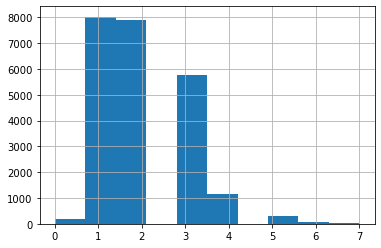

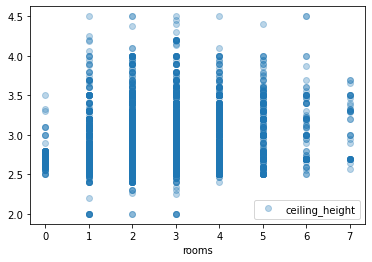

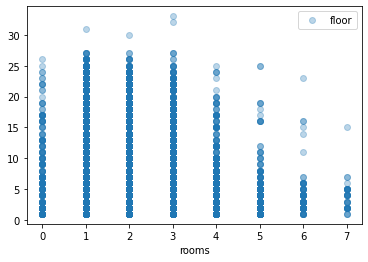

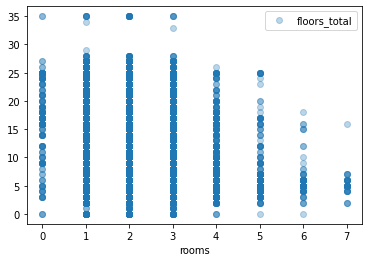

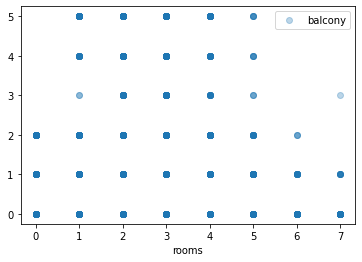

In [79]:
data['rooms'].hist()
data.plot(x = 'rooms', y = 'ceiling_height', style = 'o', alpha =0.3)
data.plot(x = 'rooms', y = 'floor', style = 'o', alpha =0.3)
data.plot(x = 'rooms', y = 'floors_total', style = 'o', alpha =0.3)
data.plot(x = 'rooms', y = 'balcony', style = 'o', alpha =0.3);

По результатам графиков можно определить:
- Наибольшее количество значений находятся в ячейках 1 - 2
- В среднем высота потолка 2 - 3 на количество комнат 2, 3
- Чем больше комнат тем ниже этаж
- Недвижимости с 1-3 комнат продают в домах с общим этажом с 1-30, начиная с количества комнат 4 - общее число этажей недвижимости уменьшается 
- Чем больше комнат, тем меньше балконов
- Межквартильный размах 1 - 3
- Медианное значение 2

Далее рассмотрим столбец `ceiling_height`. Построим гистограмму для столбца, а также графики отношения данного столбца с остальными

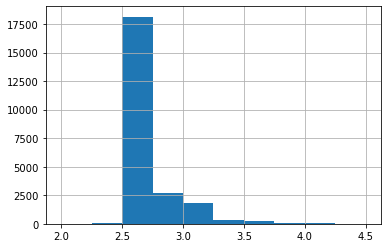

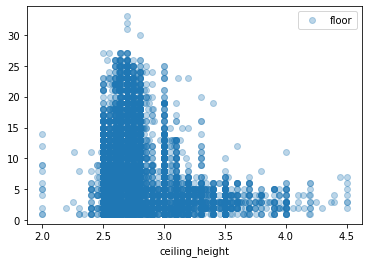

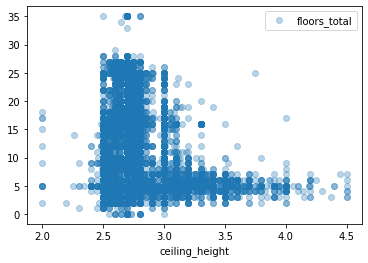

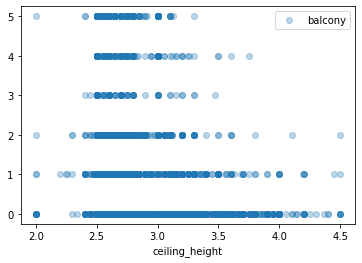

In [80]:
data['ceiling_height'].hist()
data.plot(x = 'ceiling_height', y = 'floor', style = 'o', alpha =0.3)
data.plot(x = 'ceiling_height', y = 'floors_total', style = 'o', alpha =0.3)
data.plot(x = 'ceiling_height', y = 'balcony', style = 'o', alpha =0.3);

По результатам графиков можно определить:
- Гистограмма имеет скошенное вправо распределение 
- Наибольшее количество значений находятся в ячейке 2,5 - 2,7 м
- Выделяются значения 2.5, 2.6, 2.7, 2,8 и 3м 
- Чем выше высота потолка, там ниже этаж
- Чем выше высота потолка, там ниже общее количетсво этажей в недвижимости
- Чем выше высота потолка, тем меньше количество балконов
- Межквартильный размах 2.550781 - 2.699219
- Медианное значение 2.699219

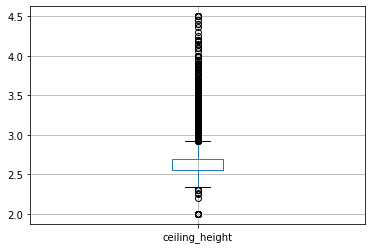

In [81]:
data.boxplot('ceiling_height');

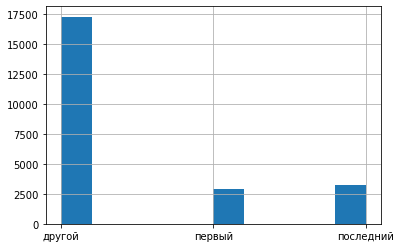

In [82]:
data['floor_type'].hist();

- Наибольшее количество значений находятся в ячейке "другой"

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
        * Постройте гистограмму.
        * Посчитайте среднее и медиану.
        * В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?


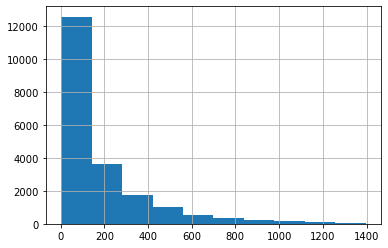

In [83]:
data['days_exposition'].hist();

In [58]:
data['days_exposition'].describe()

count    20308.000000
mean       178.894531
std        215.614670
min          3.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1396.000000
Name: days_exposition, dtype: float64

3.0 505.0


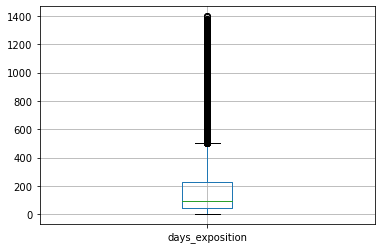

In [59]:
data.boxplot('days_exposition')

days_exposition_min = min(data.loc[data['days_exposition'].isna() == False]['days_exposition'])
days_exposition_max = max(data.loc[data['days_exposition'].isna() == False]['days_exposition'])

q1 = data.days_exposition.quantile(0.25)
q3 = data.days_exposition.quantile(0.75)

iqr = q3 - q1

min_ = max(days_exposition_min, q1 - 1.5 * iqr)
max_ = min(days_exposition_max, q3 + 1.5 * iqr)

print(min_, max_)

Обычно продажа занимает от 45 - 229 дней, в среднем 95 дней уходит чтобы продать недвижимость. Продажи за 3 дня считаются слишком быстрыми, а продажи больше 505 дней считаются необычно долгими

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
        * Изучите, зависит ли цена от:
        * общей площади;
        * жилой площади;
        * площади кухни;
        * количества комнат;
        * этажа, на котором расположена квартира (первый, последний, другой);
        * даты размещения (день недели, месяц, год).
        * Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.


Как было описано выше:
- Чем больше общая площадь недвижимости, тем больше цена на момент снятия с публикации
- Чем больше жилая площадь тем больше цена на момент снятия с публикации
- Чем больше площадь кухни, тем больше цена на момент снятия с публикации
- Чем больше комнат, тем выше цена

Далее рассмотрим отношение цены на тип расположения этажа и даты размещения:

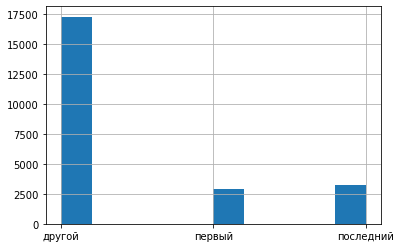

In [84]:
data['floor_type'].hist();

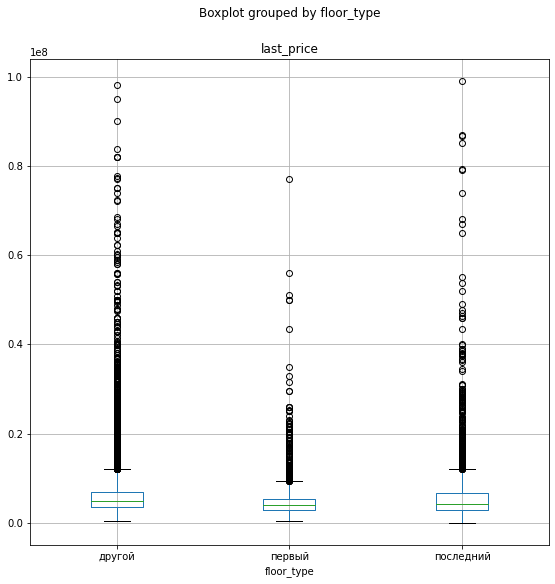

In [85]:
data[data.floor_type.isin(data.floor_type.unique())].boxplot('last_price', by='floor_type',figsize=(9,9));


По результатам диаграммы размаха, можно определить что средняя цена недвижимости чуть выше на этажах с типом "другой", когда как средняя цена на первом этаже чуть ниже остальных. 

Далее рассмотрим коэффициент корелляции

In [62]:
print('Коэффициент корелляции между ценой и \nобщей площади\t', data['last_price'].corr(data['total_area']))
print('жилой площади\t', data['last_price'].corr(data['living_area']))
print('площади кухни\t', data['last_price'].corr(data['kitchen_area']))
print('дня недели\t', data['last_price'].corr(data['day_of_week']))
print('месяца\t\t', data['last_price'].corr(data['month']))
print('года\t\t', data['last_price'].corr(data['year']))

Коэффициент корелляции между ценой и 
общей площади	 0.7491413042866436
жилой площади	 0.6612027260811171
площади кухни	 0.5761013831505207
дня недели	 -0.005447952160028838
месяца		 0.008833415908464648
года		 -0.04857712495125672


С ростом цены, растут и значения общей площади, жилой площади, площади кухни, количества комнат. 
- Самый большой коэффициент корелляции 0.749, связь между значениями - цены и общей площади
- Величины жилой площади, площади кухни, имеют коэффициент корелляции 0.576, 0.66, то есть не слишком сильной связи с ценой.
- Коэффициент корелляции связи цены от месяца публикации сильно мала 0.0088
- Коэффициент корелляции связи цены от дня недели и года сильно мала -0.005 и -0.048, а также с ростом первой величины, вторая уменьшается, поэтому коэффициент корелляции имеет отрицательное значение. 

Таким же способом построим диаграмму размаха для дней недели

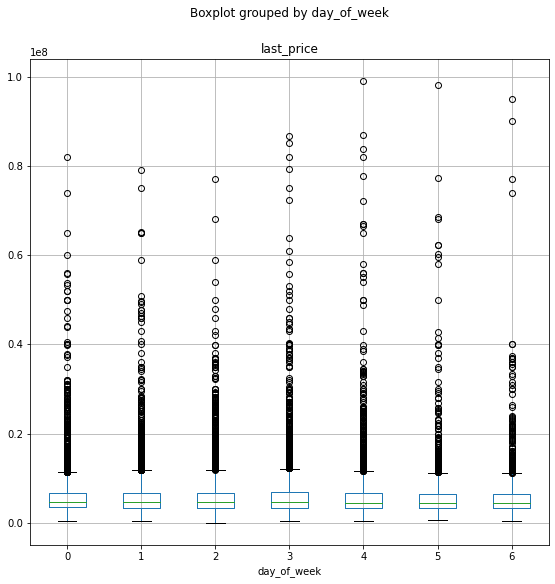

In [86]:
data[data.day_of_week.isin(data.day_of_week.unique())].boxplot('last_price', by='day_of_week',figsize=(9,9));

От дня недели когда была размещена публикация не сильно зависит цена.

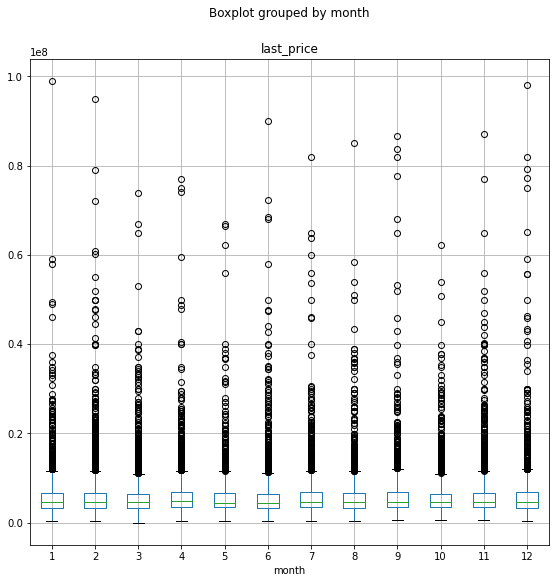

In [87]:
data[data.month.isin(data.month.unique())].boxplot('last_price', by='month',figsize=(9,9));

- Минимальная средняя цена пулбикована в марте, июне.
- Максимальная средняя цена публикована в августе

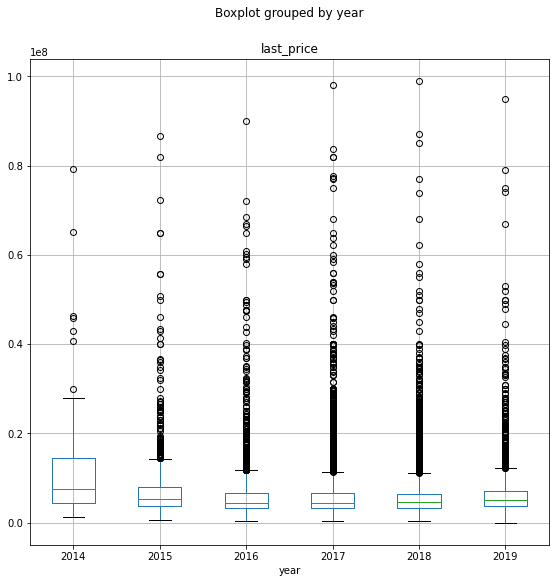

In [88]:
data[data.year.isin(data.year.unique())].boxplot('last_price', by='year',figsize=(9,9));

По результатам диаграммы размаха, можно определить что средняя цена на недвижимость не сильно зависит от года.

- Максимальная средняя цена пулбикована в 2014 году
- Минимальная средняя цена пулбикована в 2016 году

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.


Для начала сгруппируем по наименованию населенного пункта, далее применяя метод `agg()` вычислим количество объявлений и среднюю цену одного квадратного метра. Отсортируем по количеству объявлений и выберем первые 10 записей

In [66]:
data_2 = data.groupby('locality_name').agg({ 'last_price':'count','price_per_square':'mean'})
#переименуем название столбцов для удобства
data_2.columns = ['count', 'price_per_square']
#Отсортируем по количеству и выберем первые 10 строк
data_3 = data_2.sort_values(by = 'count', ascending = False).head(10)
#Выведем таблицу населенных пунктов с средней ценой за квадратуру
display(pd.DataFrame({'Цена за квадратуру':data_3['price_per_square'] }).style.format('{:.2f}').background_gradient('coolwarm'))

,Цена за квадратуру
locality_name,
санкт-петербург,113212.12
поселок мурино,85681.77
поселок шушары,78677.37
всеволожск,68670.55
пушкин,102906.81
колпино,75333.30
поселок парголово,90103.14
гатчина,68746.15
деревня кудрово,92473.55


- Минимальная средняя цена за квадратуру из первых 10 населенных пунктов является - 58141.91 города Выборг
- Максимальная средняя цена за квадратуру из первых 10 населенных пунктов является - 113212.12 Санкт-Петербурга 

In [67]:
data_2.sort_values(by = 'price_per_square', ascending = True).head(1)

,count,price_per_square
locality_name,,
деревня старополье,3,11206.219727


Дешевое жилье можно приобрести в деревне Ставрополе

In [68]:
data_2.sort_values(by = 'price_per_square', ascending = False).head(1)

,count,price_per_square
locality_name,,
зеленогорск,24,115122.796875


Самое дорогое жилье приобретают в Зеленогорске

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [69]:
#Выделяем квартиры в Санкт-Петербурге
data_4 = data.query('(locality_name == "санкт-петербург") & is_apartment == True' )
#Вычисляем среднюю цену для каждого киломентра
data_4 = data_4.groupby('city_centers_nearest_km').agg({'price_per_square':'mean'})
display(pd.DataFrame({'Средняя цена за квадратуру':data_4['price_per_square'] }).style.format('{:.2f}').background_gradient('coolwarm'))

,Средняя цена за квадратуру
city_centers_nearest_km,
0.000000,485587.50
1.000000,218978.09
2.000000,278000.00
3.000000,106756.76
4.000000,114964.38
5.000000,90000.00
6.000000,175583.34
8.000000,126229.51
9.000000,146315.80


- Самые дорогие квартиры в центре Санкт-Петербурга - 485587.50
- Самые дешевые на расстоянии 29 км - 56976.74

### Общий вывод

**Написать общий вывод**

Описать полученные результаты и зафиксировать основной вывод проведённого исследования.

- Самая дорогая недвижимость в Зеленогорске, самая дешевая в деревне Ставрополе.
- Самые дорогие квартиры Санкт-Петербурга находятся в центре города 
- Самые дешевые квартиры Санкт-Петербурга находятся на расстоянии 29км от центра
- Максимальная средняя цена пулбикована в 2014 году
- Минимальная средняя цена пулбикована в 2016 году
- Чем больше общая площадь недвижимости, тем больше цена на момент снятия с публикации
- Чем больше жилая площадь тем больше цена на момент снятия с публикации
- Чем больше площадь кухни, тем больше цена на момент снятия с публикации
- Чем больше комнат, тем выше цена